<a href="https://colab.research.google.com/github/bretem/Prediccion_diabetis/blob/main/Predicci%C3%B3n_interacci%C3%B3n_diabetes__hipertensi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción iteración: Diabetis e Hipertensión


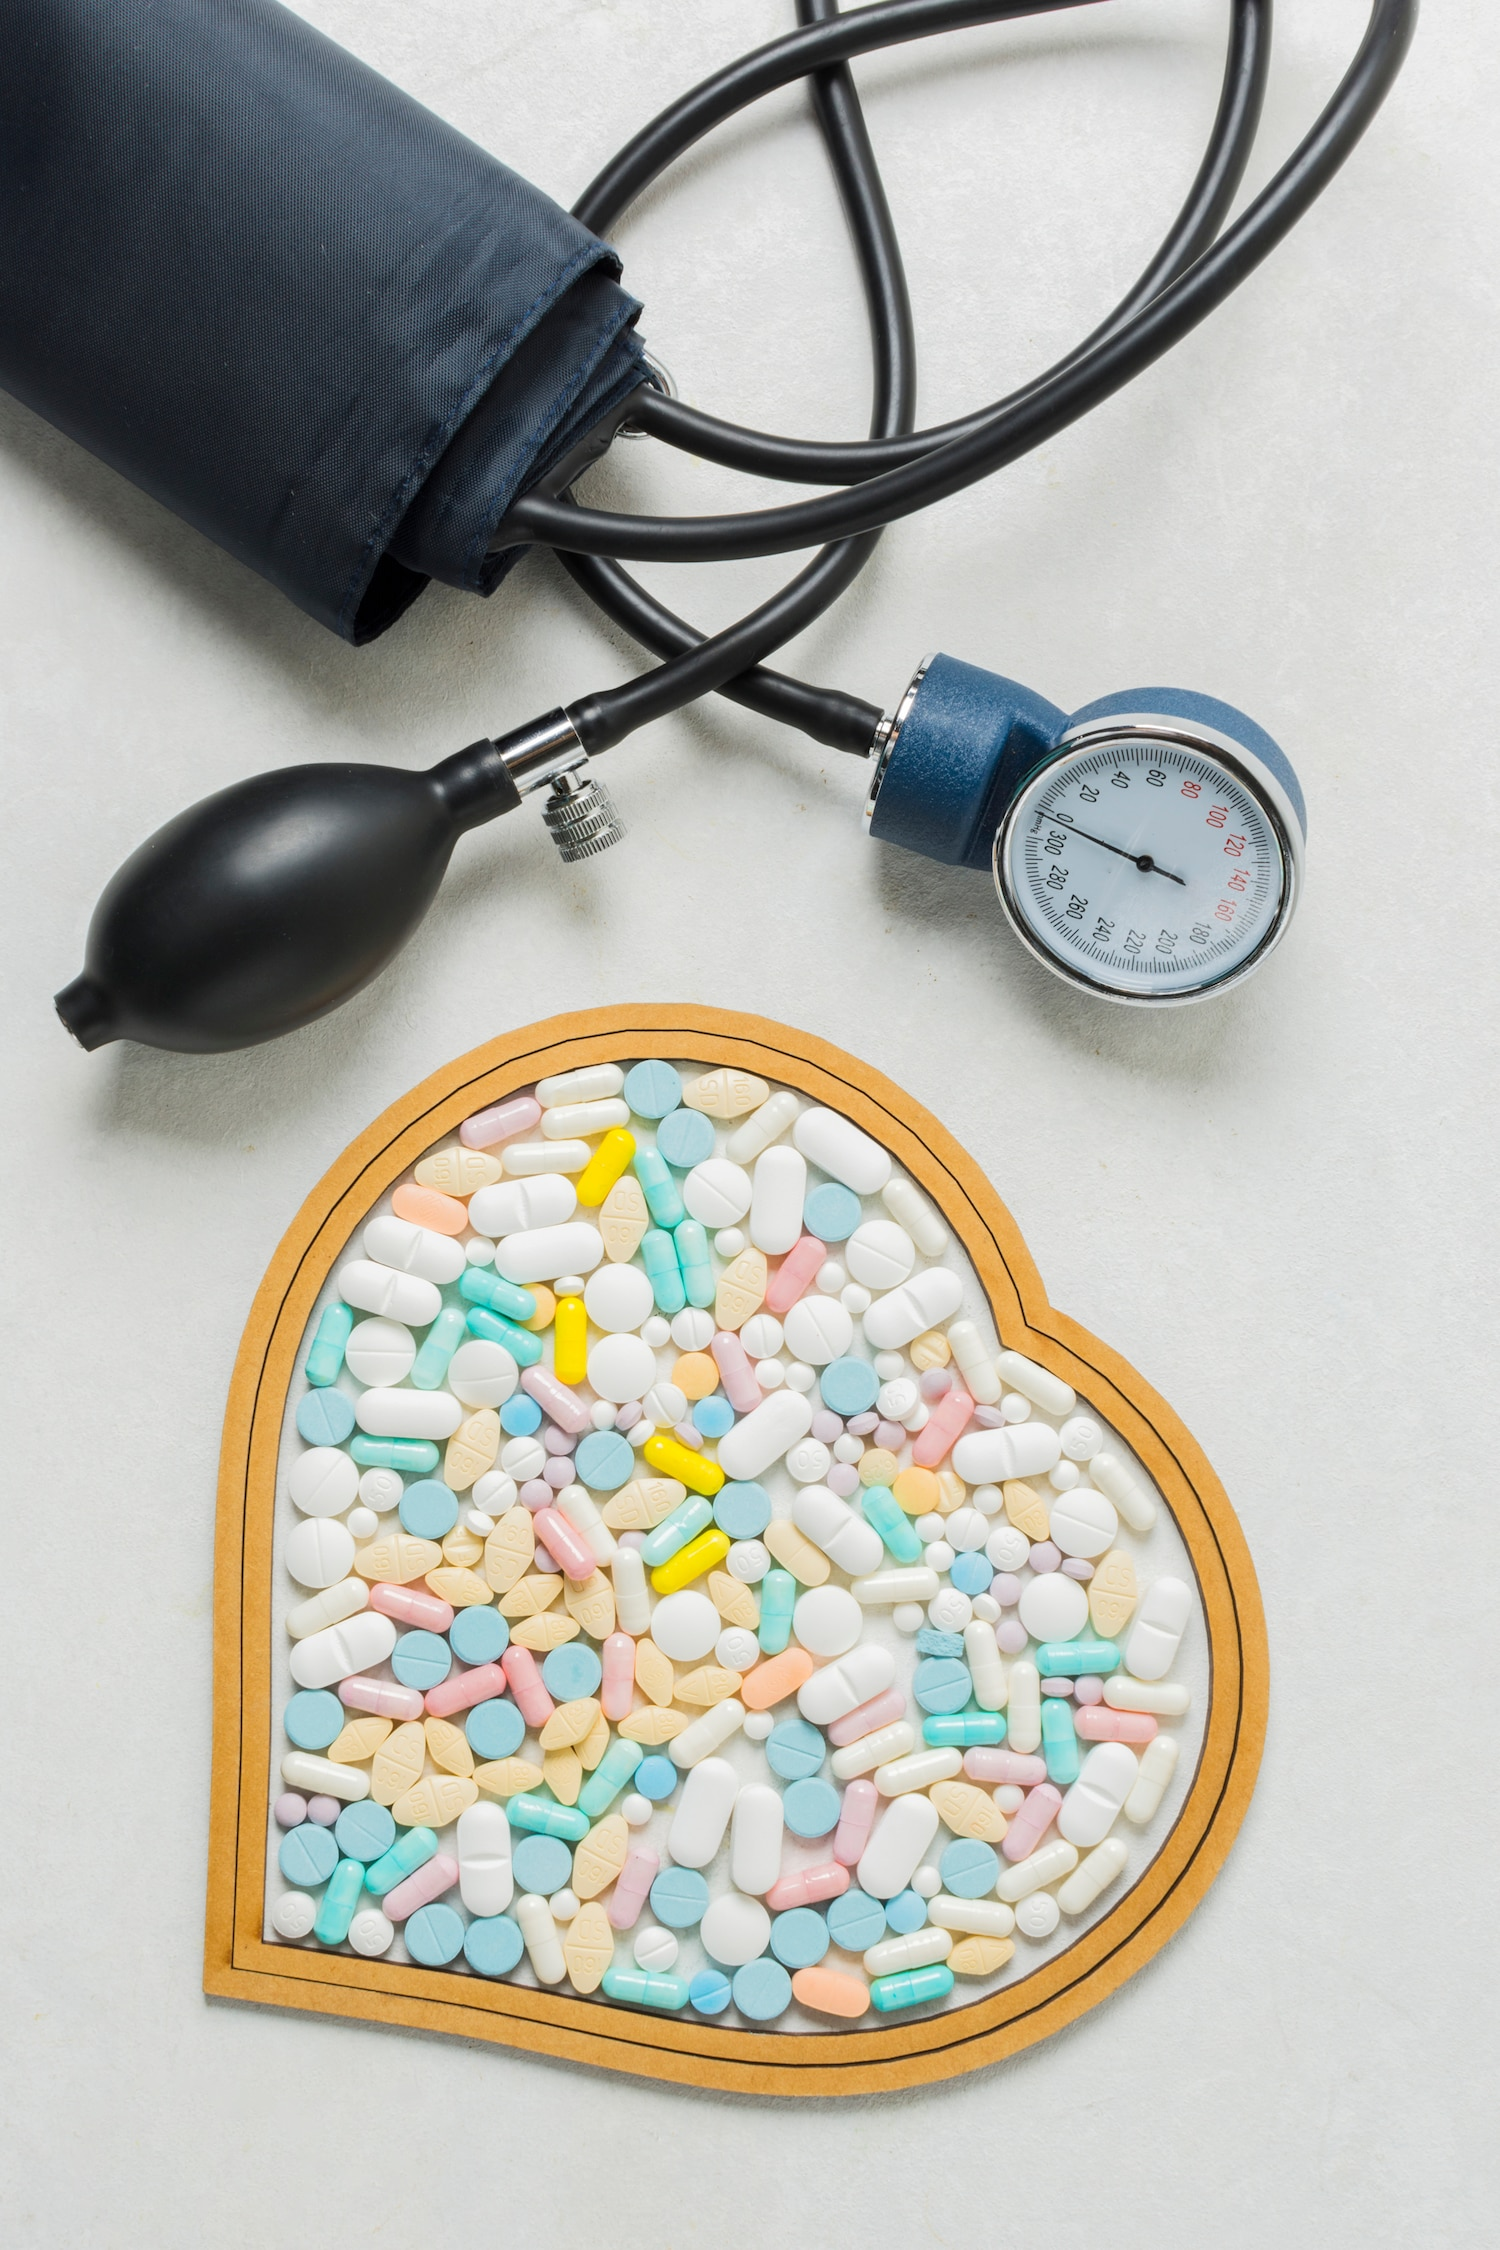

## Contenido

### 1. Introducción

1.1. Contexto

1.2. Motivación y Objetivo

### 2. Ejecución del Proyecto

2.1. Adquisición de los datos

2.2. Metodología


### 3. Resultados

3.1. Data Preprocesing

3.2. Exploración de los datos (EDA)

3.3. Modelado y Testing


### 4. Conclusión

4.1. Logros y Beneficios

4.2. Mejoras futuras


# 1.Introducción

## 1.1 Contexto


Esta trabajo explora la interacción entre la diabetes y la hipertensión. Comprender sus factores de riesgo es fundamental para una prevención y un tratamiento eficaces. Analizaremos en profundidad cómo se interconectan estas dos afecciones y las implicaciones para la salud en general.


**Entendiendo la diabetes:**

La diabetes es una enfermedad crónica que se caracteriza por niveles elevados de azúcar en sangre. Puede provocar complicaciones graves, como enfermedades cardíacas e insuficiencia renal. Entre los factores de riesgo clave se encuentran la obesidad, la inactividad y la genética, que también pueden influir en la hipertensión.

**Entendiendo la hipertensión**

La hipertensión, o presión arterial alta, suele denominarse un asesino silencioso debido a que no presenta síntomas. Los principales factores de riesgo incluyen el alto consumo de sal, la obesidad y el estrés. Es esencial reconocer cómo estos factores se superponen con los de la diabetes.
Factores de riesgo compartidos
Tanto la diabetes como la hipertensión comparten varios factores de riesgo, como la obesidad, la mala alimentación y la inactividad física. Abordar estos factores modificables puede reducir significativamente el riesgo de desarrollar cualquiera de las dos afecciones, lo que pone de relieve la necesidad de realizar cambios en el estilo de vida.

**Impacto en la salud**

La coexistencia de diabetes e hipertensión aumenta el riesgo de sufrir problemas de salud graves, como enfermedades cardíacas y accidentes cerebrovasculares. Comprender esta interacción es fundamental para que los profesionales de la salud desarrollen planes de tratamiento integrales que aborden ambas afecciones.

## 1.2 Motivación y Objetivo

Predecir si un paciente tiene un riesgo potencial de padecer diabetes o hipertensión, con el objetivo de prevenir futuros costes sanitarios y de salud.

Para lograr este objetivo, utilizaremos técnicas avanzadas de machine learning.

Evaluaremos el rendimiento del modelo utilizando métricas como la precisión, la matriz de confusión y el AUC-ROC, asegurando así su eficacia y fiabilidad.


# 2. Ejecución del Proyecto


## 2.1. Adquisición de los datos

El conjunto de datos de predicción de la diabetes resume una gran cantidad de información médica y demográfica extraída de los registros de los pacientes, junto con su estado de diabetes clasificado como positivo o negativo. Esta rica reserva de información abarca atributos cruciales que incluyen edad, sexo, índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, antecedentes de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre.

## 2.2. Metodología

En este Proyecto vamos a entrenar los modelos GB, XGB y LGBM, realizando una comparativa y seleccionando el de mejor resultado, para nuestra predicción.

**Aplicaciones del Modelo**

Avance en la atención médica: construir modelos sofisticados de aprendizaje automático destinados a pronosticar la aparición de diabetes basándose en historiales médicos y perfiles demográficos completos. Al aprovechar estos modelos, los profesionales de la salud pueden discernir eficazmente a los pacientes con mayor riesgo de diabetes, facilitando una intervención temprana y estrategias de tratamiento personalizadas.

Esfuerzos de investigación: más allá de su utilidad clínica, los investigadores pueden aprovechar el conjunto de datos para profundizar en la intrincada interacción entre diversas variables médicas y demográficas y la propensión al desarrollo de diabetes. Estas exploraciones prometen descubrir conocimientos invaluables sobre la naturaleza multifacética de la etiología de la diabetes, fomentando así avances innovadores en medicina preventiva e iniciativas de salud pública.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 3. Resultados

#### Librerias principales

In [ ]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#### Datos

Los datos están disponibles en elsiguiente enlace https://www.kaggle.com/datasets/nazishjaveed/diabetes-prediction-dataset

#### Descargando los datos

In [ ]:
# read data
df = pd.read_csv('/content/drive/My Drive/diabetes/diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## 3.1. Data Preprocesing

### Estadística descripitva

In [ ]:
# check for descriptive statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Información datos

In [ ]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Missing Values

In [ ]:
# check for null values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


### Valores duplicados

In [ ]:
# check duplicate values
print(df.duplicated().sum())
# remove duplicate values
df = df.drop_duplicates()
print("______Removed Duplicate______")
print(df.duplicated().sum())

3854
______Removed Duplicate______
0


## 3.2. Exploración de los datos (EDA)

Verificamos el recuento de las columnas Género, Hipertensión, Enfermedad cardíaca, historial de tabaquismo y Diabetes.

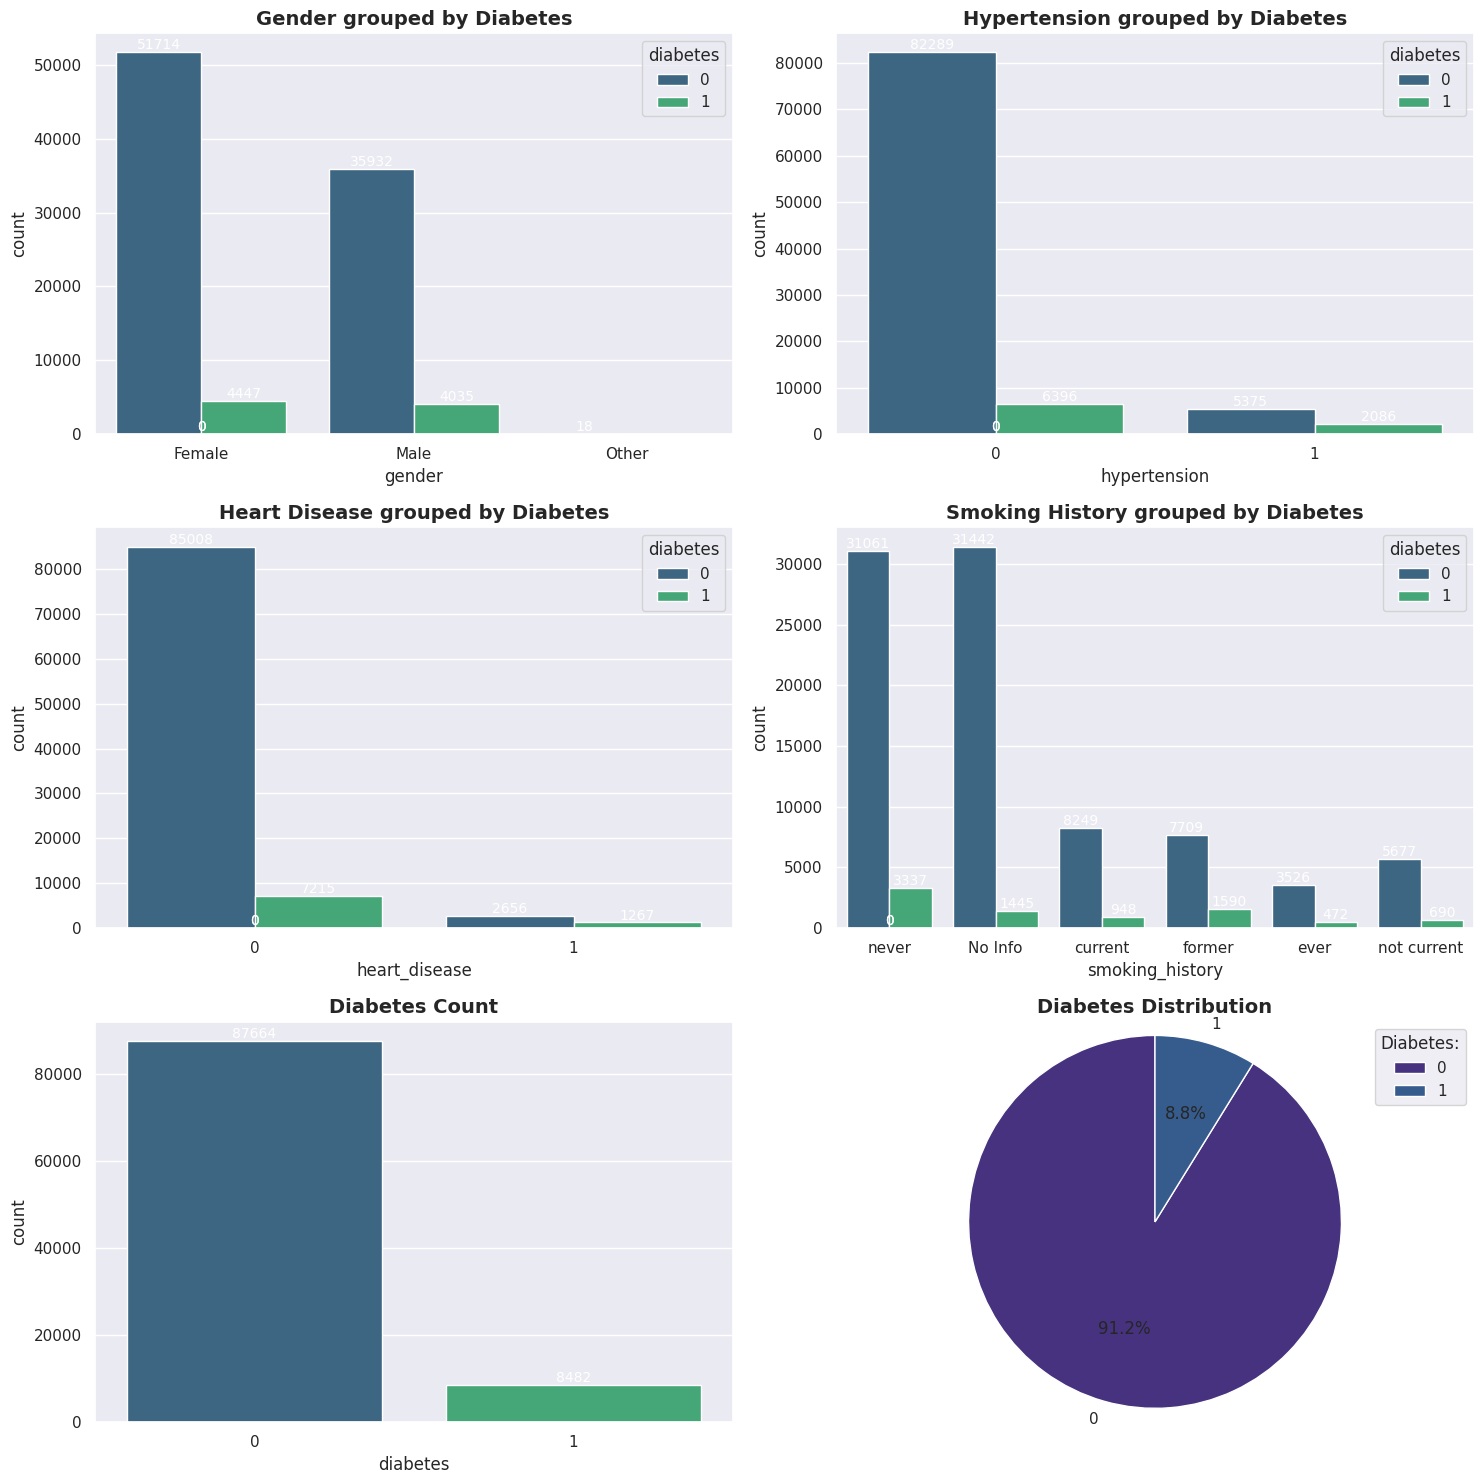

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para añadir conteos en las barras
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                    textcoords='offset points')

# Función para crear gráficos de barras
def plot_count(ax, x, hue, title, data):
    sns.countplot(ax=ax, x=x, hue=hue, data=data, palette='viridis')
    ax.set_title(title, fontsize=14, fontweight='bold')
    add_counts(ax)

# Aplicar tema moderno
sns.set_theme(style="darkgrid")

# Configuración de la figura
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Gráficos de barras
plot_count(axes[0, 0], 'gender', 'diabetes', 'Gender grouped by Diabetes', df)
plot_count(axes[0, 1], 'hypertension', 'diabetes', 'Hypertension grouped by Diabetes', df)
plot_count(axes[1, 0], 'heart_disease', 'diabetes', 'Heart Disease grouped by Diabetes', df)
plot_count(axes[1, 1], 'smoking_history', 'diabetes', 'Smoking History grouped by Diabetes', df)
plot_count(axes[2, 0], 'diabetes', None, 'Diabetes Count', df)

# Gráfico de pastel para la distribución de diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
axes[2, 1].set_title('Diabetes Distribution', fontsize=14, fontweight='bold')
axes[2, 1].axis('equal')  # Asegura que el pastel se dibuje como un círculo.
axes[2, 1].legend(title='Diabetes:', loc='upper right')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Grupo de recuento de edad_por diabetes(0,1)

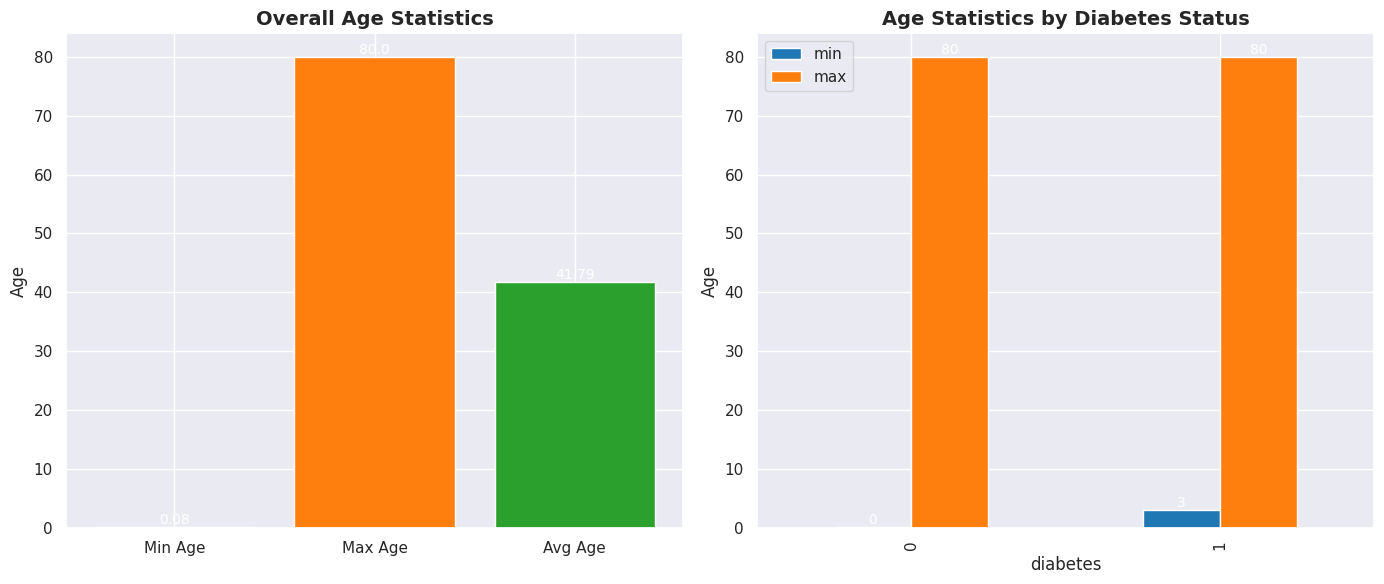

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular estadísticas de edad
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Contar individuos con y sin diabetes
diabetes_counts = df['diabetes'].value_counts()

# Agrupar por estado de diabetes y calcular edades mínimas y máximas
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Configuración de la figura
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para edad mínima, máxima y promedio
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[0].set_title('Overall Age Statistics', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Age')

# Anotar barras con sus valores
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10, color='white')

# Gráfico de barras para edades mínimas y máximas agrupadas por estado de diabetes
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1], color=['#1f77b4', '#ff7f0e'])
ax[1].set_title('Age Statistics by Diabetes Status', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Age')

# Anotar barras con sus valores
for p in grouped_bars.patches:
    grouped_bars.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                          textcoords='offset points')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


*  **Minimum age how have diabetes is `3` year & Maximum is `80`**
*  **Minimum age how have not  diabetes is `0.08`  year & Maximum is `80`**

### Historial de diabetes y tabaquismo

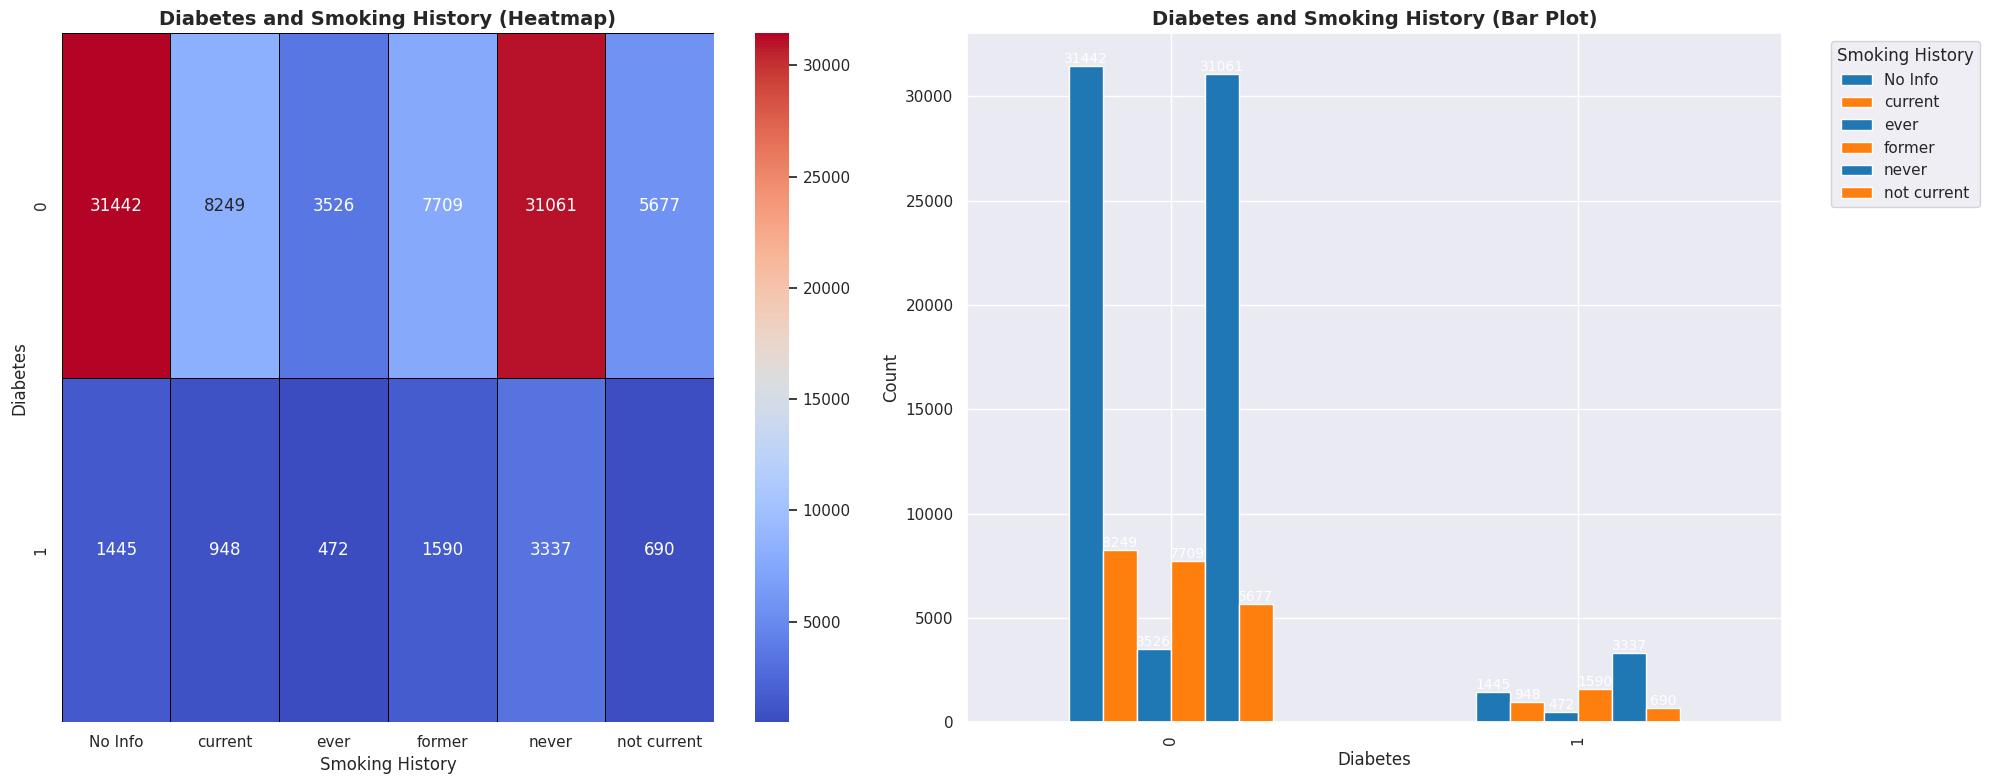

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear tabla cruzada
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Crear subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Graficar la tabla cruzada como un mapa de calor
sns.heatmap(cross_table, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Graficar la tabla cruzada con barras separadas para el historial de tabaquismo
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=['#1f77b4', '#ff7f0e'])
ax[1].set_title('Diabetes and Smoking History (Bar Plot)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Anotar barras con sus valores
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='white')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### Codificamos los datos

In [ ]:
# incode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

### Análisis de Componentes Principales (PCA)

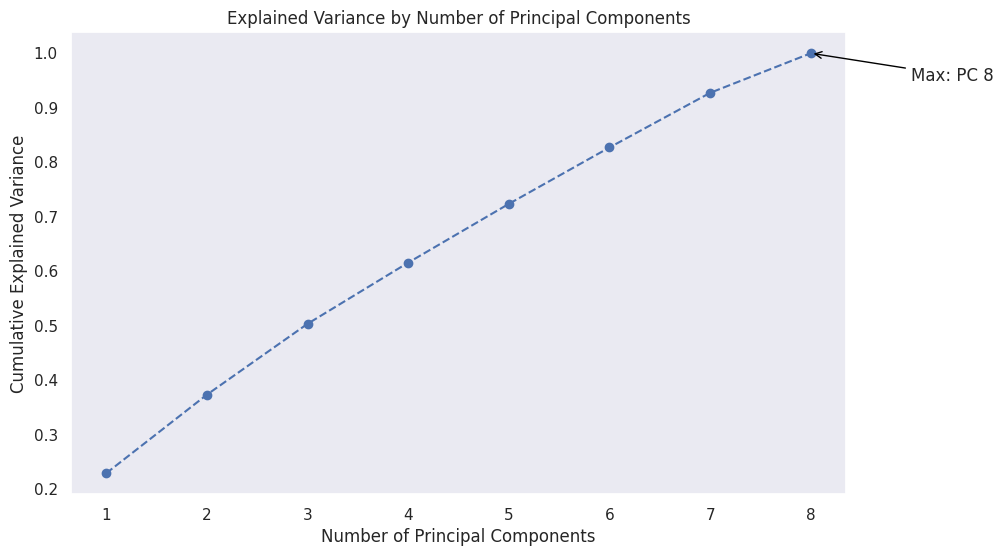

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [ ]:


# Assume df is your dataframe

# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)



>El mejor número de componentes es 8

## 3.3. Modeling y Testing

>


### Model(GradientBoosting)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar y entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')
print(f'Gradient Boosting AUC: {auc_gb:.4f}')
print(f'Gradient Boosting Classification Report:\n{classification_report(y_test, y_pred_gb)}')


Gradient Boosting Accuracy: 0.9630
Gradient Boosting AUC: 0.9679
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.94      0.62      0.75      1721

    accuracy                           0.96     19230
   macro avg       0.95      0.81      0.87     19230
weighted avg       0.96      0.96      0.96     19230



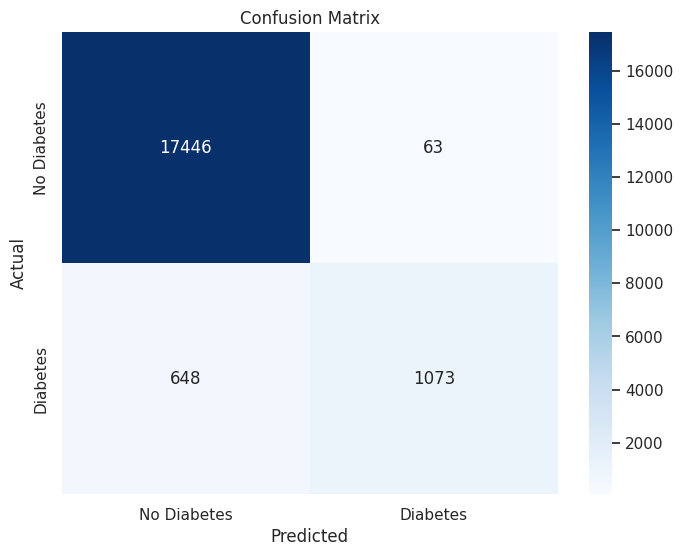

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**La matriz de confusión arrojó los siguientes resultados:**

Verdaderos negativos (No Diabetes predicho como No Diabetes): 17.446

Falsos positivos (No Diabetes predicho como Diabetes): 63

Falsos negativos (Diabetes predicho como No Diabetes): 648

Verdaderos positivos (Diabetes predicho como Diabetes): 1.073



### Model (XGBClassifier)

In [ ]:
# Inicializar y entrenar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print(f'XGBoost AUC: {auc_xgb:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred_xgb)}')


XGBoost Accuracy: 0.9663
XGBoost AUC: 0.9724
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.93      0.67      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.95      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230



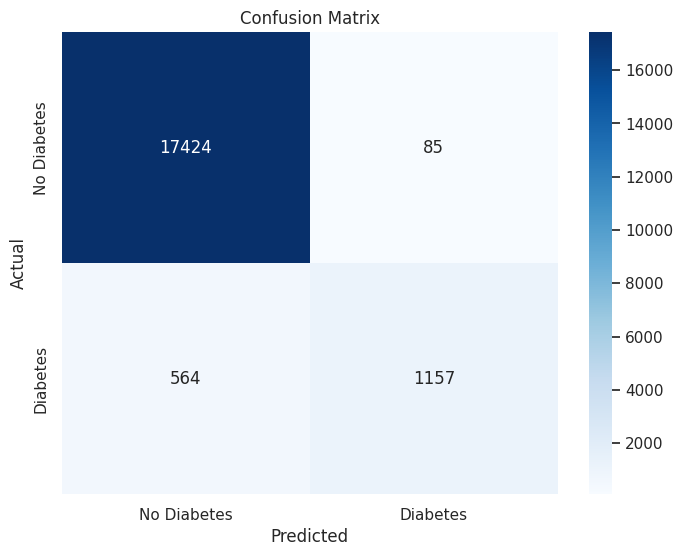

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**La matriz de confusión arrojó los siguientes resultados:**

Verdaderos negativos (No Diabetes predicho como No Diabetes): 17.446

Falsos positivos (No Diabetes predicho como Diabetes): 85

Falsos negativos (Diabetes predicho como No Diabetes): 564

Verdaderos positivos (Diabetes predicho como Diabetes): 1.157



### Model(LGBMClassifier)

In [ ]:
# Inicializar y entrenar el modelo LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm:.4f}')
print(f'LightGBM AUC: {auc_lgbm:.4f}')
print(f'LightGBM Classification Report:\n{classification_report(y_test, y_pred_lgbm)}')

[LightGBM] [Info] Number of positive: 6761, number of negative: 70155
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 76916, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087901 -> initscore=-2.339536
[LightGBM] [Info] Start training from score -2.339536
LightGBM Accuracy: 0.9664
LightGBM AUC: 0.9735
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.66      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230



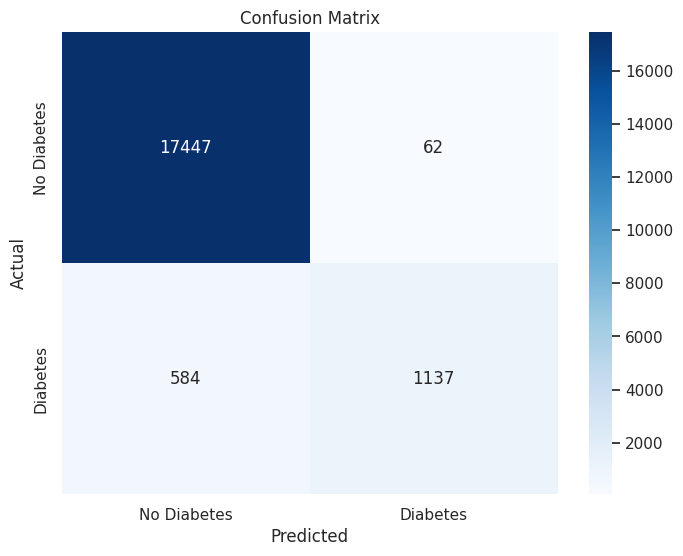

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

La matriz de confusión arrojó los siguientes resultados:

Verdaderos negativos (No Diabetes predicho como No Diabetes): 17.447

Falsos positivos (No Diabetes predicho como Diabetes): 62

Falsos negativos (Diabetes predicho como No Diabetes): 564

Verdaderos positivos (Diabetes predicho como Diabetes): 1.137

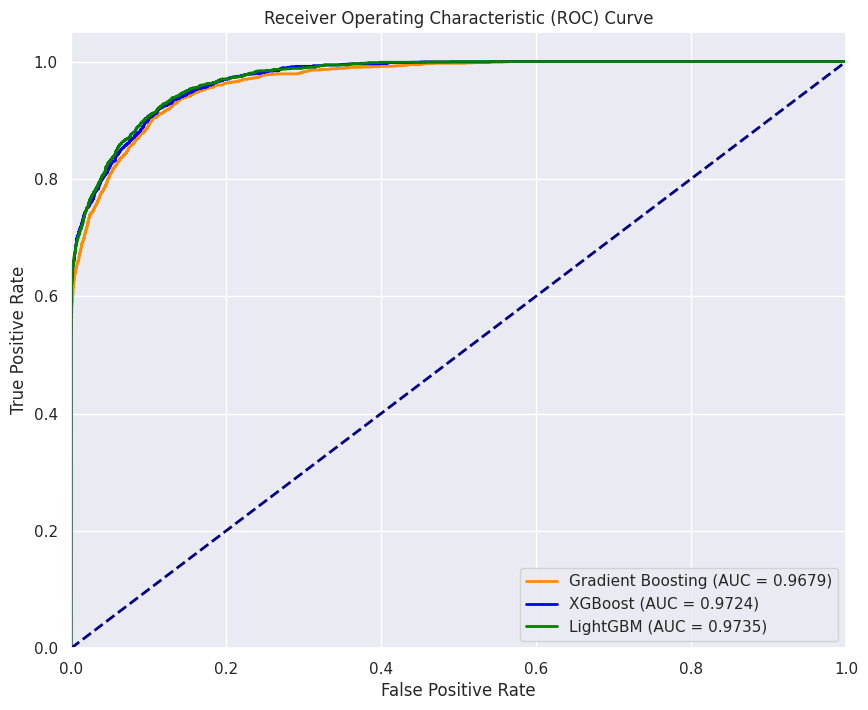

In [ ]:


# Graficar las Curvas ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {auc_gb:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_lgbm, tpr_lgbm, color='green', lw=2, label=f'LightGBM (AUC = {auc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Tras evaluar los tres modelos de Clasificación:

Las curvas de los tres modelos están muy cerca del eje y y del punto (0,1), lo que indica un buen rendimiento de los modelos. Los valores del Área Bajo la Curva (AUC) para cada modelo son:

Gradient Boosting: AUC = 0.9679 (línea naranja)

XGBoost: AUC = 0.9724 (línea azul)

LightGBM: AUC = 0.9735 (línea verde)

Estos valores de AUC indican que todos los modelos tienen un rendimiento muy alto, siendo LightGBM el que tiene el mejor rendimiento entre los tres.

In [ ]:
import pickle

# Save the model
with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)

In [ ]:
# Prepare custom data
custom_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 0, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

# Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=features)

# Standardize the custom data
custom_X = scaler.transform(custom_df[features])

# Apply PCA transformation
custom_X_pca = pca.transform(custom_X)

# Make predictions using the trained XGBoost model
custom_predictions = lgbm_model.predict(custom_X_pca)

# Print the predictions
for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")#

Person 1 is not predicted to have diabetes.
Person 2 is predicted to have diabetes.
Person 3 is predicted to have diabetes.
Person 4 is not predicted to have diabetes.
Person 5 is predicted to have diabetes.


## **Model(LGBMClassifier) For Hypertension**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Paso 1: Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Instanciar el clasificador
lgbm_clf = lgb.LGBMClassifier()

# Paso 3: Entrenar el modelo
lgbm_clf.fit(X_train, y_train)

# Paso 4: Hacer predicciones
y_pred = lgbm_clf.predict(X_test)


# Evaluar el modelo LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm:.4f}')
print(f'LightGBM AUC: {auc_lgbm:.4f}')
print(f'LightGBM Classification Report:\n{classification_report(y_test, y_pred_lgbm)}')

[LightGBM] [Info] Number of positive: 6761, number of negative: 70155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 76916, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087901 -> initscore=-2.339536
[LightGBM] [Info] Start training from score -2.339536
LightGBM Accuracy: 0.9664
LightGBM AUC: 0.9735
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.66      0.78      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.83      0.88     19230
weighted avg       0.97      0.97      0.96     19230



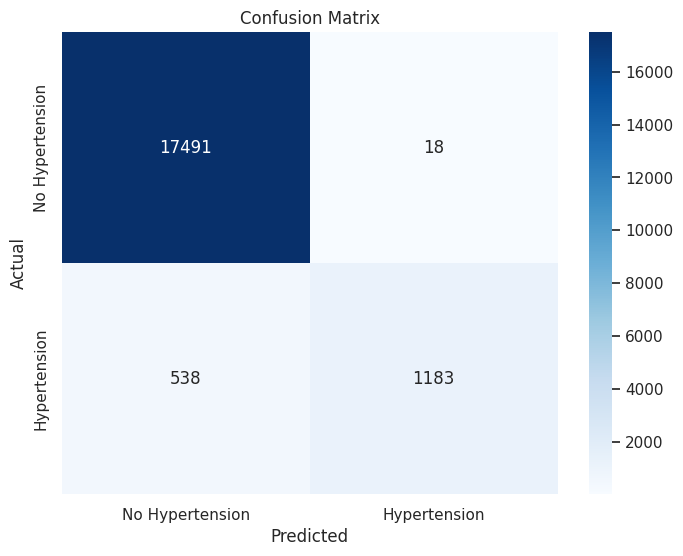

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hypertension', 'Hypertension'], yticklabels=['No Hypertension', 'Hypertension'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**La matriz de confusión para el model LGBM e Hypertensión arrojó los siguientes resultados:**

Verdaderos negativos (No Hypertension predicho como No Hypertension): 17.491

Falsos positivos (No Hypertension predicho como Hypertension): 18

Falsos negativos (Hypertension predicho como No Hypertension): 538

Verdaderos positivos (Hypertension predicho como Hypertension): 1.183

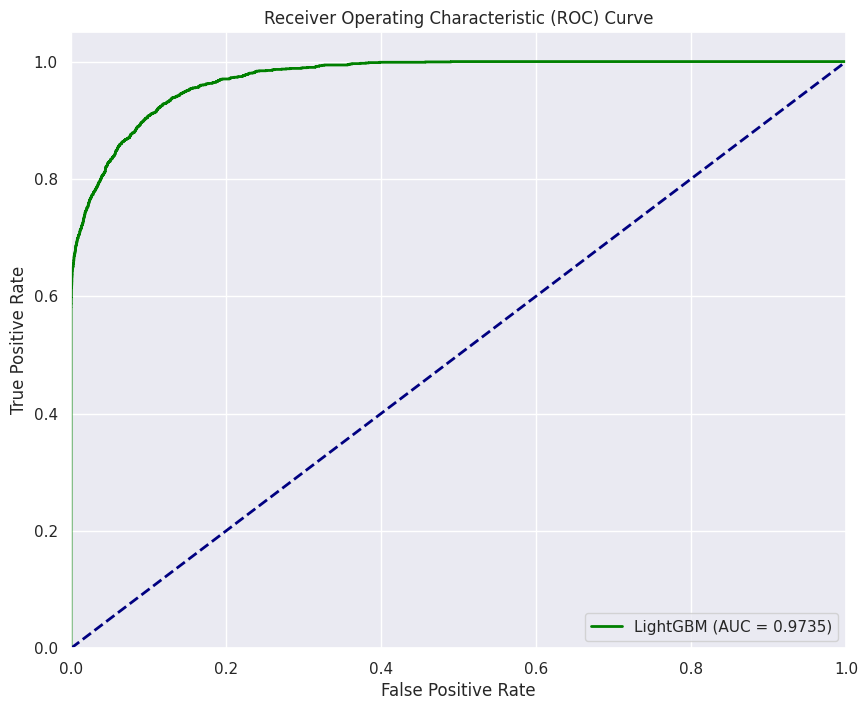

In [ ]:

# Graficar las Curvas ROC
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)

plt.figure(figsize=(10, 8))

plt.plot(fpr_lgbm, tpr_lgbm, color='green', lw=2, label=f'LightGBM (AUC = {auc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

# Save the model
with open('hypertension_model.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)

In [ ]:
features = ['gender', 'age', 'diabetes', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
customs_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 1, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

In [ ]:
custom_df = pd.DataFrame(customs_data, columns=features)
custom_predictions = lgbm_model.predict(custom_df)

for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have hypertension.")
    else:
        print(f"Person {i+1} is predicted to have hypertension.")

Person 1 is predicted to have hypertension.
Person 2 is predicted to have hypertension.
Person 3 is predicted to have hypertension.
Person 4 is predicted to have hypertension.
Person 5 is predicted to have hypertension.


# 4. Conclusión

## 4.1. Logros y Beneficios

De los tres modelos entrenados, el que arroja mejores resultados es LGBMClarifier, prediciendo con un 97,35% de nivel de confianza, si un paciente es propenso a tener diabetis o hipertensión.

En resumen, el modelo LightGBM tiene un rendimiento excelente en general, con una alta precisión y AUC.

## 4.2. Mejoras futuras

Aunque nuestros resultados han sido buenos, el recall para la clase de Diabetes e Hipertensión podría mejorarse para reducir los falsos negativos.
Los siguientes pasos serían:


*   Utilizar otras bases de datos
*   Combinar nuestro estudio con otros modelos como Las redes neuronales, especialmente las redes neuronales profundas (Deep Learning).

